Let's Load the Data and check UnderStand the Data

In [1]:
import pandas as pd
Pizza_Sales=pd.read_excel("/content/Pizza_Sale.xlsx")
Pizza_Sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [2]:
Pizza_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [3]:
null_counts = Pizza_Sales.isnull().sum()
print(null_counts)

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [4]:
null_pizza_name_id = Pizza_Sales[Pizza_Sales['pizza_name_id'].isnull()]
print(null_pizza_name_id)


     pizza_id  order_id pizza_name_id  quantity           order_date  \
36         37        15           NaN         1  2015-01-01 00:00:00   
37         38        15           NaN         1  2015-01-01 00:00:00   
38         39        15           NaN         1  2015-01-01 00:00:00   
39         40        16           NaN         1  2015-01-01 00:00:00   
40         41        16           NaN         1  2015-01-01 00:00:00   
41         42        16           NaN         1  2015-01-01 00:00:00   
309       310       131           NaN         1  2015-02-01 00:00:00   
310       311       131           NaN         1  2015-02-01 00:00:00   
311       312       132           NaN         1  2015-02-01 00:00:00   
312       313       133           NaN         1  2015-02-01 00:00:00   
313       314       133           NaN         1  2015-02-01 00:00:00   
415       416       175           NaN         1  2015-03-01 00:00:00   
416       417       176           NaN         1  2015-03-01 00:0

**Seems Like the pizza_name and the pizzasize and pizza Category are Closely releated To each other so What I can do is I will fill the Null value in the pizza_name_id based on the Those three**

In [5]:


import pandas as pd
# Create a dictionary to map pizza_name, pizza_size, pizza_category to pizza_name_id
pizza_name_id_mapping = Pizza_Sales.dropna(subset=['pizza_name_id']).groupby(['pizza_name', 'pizza_size', 'pizza_category'])['pizza_name_id'].first().to_dict()

# Function to fill null pizza_name_id based on other columns
def fill_pizza_name_id(row):
  if pd.isnull(row['pizza_name_id']):
    key = (row['pizza_name'], row['pizza_size'], row['pizza_category'])
    if key in pizza_name_id_mapping:
      return pizza_name_id_mapping[key]
  return row['pizza_name_id']

# Apply the function to fill null values
Pizza_Sales['pizza_name_id'] = Pizza_Sales.apply(fill_pizza_name_id, axis=1)

# Check if null values are filled
null_counts = Pizza_Sales.isnull().sum()
print(null_counts)


pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [6]:
null_pizza_name_id = Pizza_Sales[Pizza_Sales['pizza_name'].isnull()]
print(null_pizza_name_id)


     pizza_id  order_id pizza_name_id  quantity           order_date  \
688       689       303   pepperoni_s         1  2015-05-01 00:00:00   
689       690       304    hawaiian_s         1  2015-05-01 00:00:00   
690       691       304    mexicana_l         1  2015-05-01 00:00:00   
691       692       305   pepperoni_l         1  2015-05-01 00:00:00   
692       693       305    sicilian_s         1  2015-05-01 00:00:00   
693       694       305  spicy_ital_m         1  2015-05-01 00:00:00   
694       695       306    big_meat_s         1  2015-05-01 00:00:00   

    order_time  unit_price  total_price pizza_size pizza_category  \
688   20:02:51        9.75         9.75          S        Classic   
689   20:07:58       10.50        10.50          S        Classic   
690   20:07:58       20.25        20.25          L         Veggie   
691   20:35:40       15.25        15.25          L        Classic   
692   20:35:40       12.25        12.25          S        Supreme   
693   20:

**Now Lets Fill the Pizza_name based on the Three Column as I have done Before**

In [7]:
import pandas as pd
# Create a dictionary to map pizza_name_id, pizza_size, pizza_category to pizza_name
pizza_name_mapping = Pizza_Sales.dropna(subset=['pizza_name']).groupby(['pizza_name_id', 'pizza_size', 'pizza_category'])['pizza_name'].first().to_dict()

# Function to fill null pizza_name based on other columns
def fill_pizza_name(row):
  if pd.isnull(row['pizza_name']):
    key = (row['pizza_name_id'], row['pizza_size'], row['pizza_category'])
    if key in pizza_name_mapping:
      return pizza_name_mapping[key]
  return row['pizza_name']

# Apply the function to fill null values
Pizza_Sales['pizza_name'] = Pizza_Sales.apply(fill_pizza_name, axis=1)

# Check if null values are filled
null_counts = Pizza_Sales.isnull().sum()
print(null_counts)

null_pizza_name_id = Pizza_Sales[Pizza_Sales['pizza_name'].isnull()]
print(null_pizza_name_id)


pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            0
dtype: int64
Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [8]:
import pandas as pd
# Create a dictionary to map pizza_name_id, pizza_size, pizza_name to pizza_category
pizza_category_mapping = Pizza_Sales.dropna(subset=['pizza_category']).groupby(['pizza_name_id', 'pizza_size', 'pizza_name'])['pizza_category'].first().to_dict()

# Function to fill null pizza_category based on other columns
def fill_pizza_category(row):
  if pd.isnull(row['pizza_category']):
    key = (row['pizza_name_id'], row['pizza_size'], row['pizza_name'])
    if key in pizza_category_mapping:
      return pizza_category_mapping[key]
  return row['pizza_category']

# Apply the function to fill null values
Pizza_Sales['pizza_category'] = Pizza_Sales.apply(fill_pizza_category, axis=1)

# Check if null values are filled
null_counts = Pizza_Sales.isnull().sum()
print(null_counts)

null_pizza_category = Pizza_Sales[Pizza_Sales['pizza_category'].isnull()]
print(null_pizza_category)


pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category        0
pizza_ingredients    13
pizza_name            0
dtype: int64
Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [9]:
import pandas as pd
# Function to fill null total_price based on quantity and unit_price
def fill_total_price(row):
  if pd.isnull(row['total_price']):
    if not pd.isnull(row['quantity']) and not pd.isnull(row['unit_price']):
      return row['quantity'] * row['unit_price']
  return row['total_price']

# Apply the function to fill null values in total_price
Pizza_Sales['total_price'] = Pizza_Sales.apply(fill_total_price, axis=1)

# Check if null values are filled
null_counts = Pizza_Sales.isnull().sum()
print(null_counts)


pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients    13
pizza_name            0
dtype: int64


**Now all the Columns have cleaned and I have also filled the Null values as well Only columns that have a Null value is pizza_ingredient since I have not going to  perform any Analysis on It i have kept it as it is.**

**Now Let's Do a feature Engineering**

In [10]:
# import pandas as pd
# Convert 'order_date' to datetime objects
Pizza_Sales['order_date'] = pd.to_datetime(Pizza_Sales['order_date'], errors='coerce')

# Extract date, month, and week components
Pizza_Sales['order_date_date'] = Pizza_Sales['order_date'].dt.date
Pizza_Sales['order_date_month'] = Pizza_Sales['order_date'].dt.month
order_date_week = Pizza_Sales['order_date'].dt.isocalendar().week
Pizza_Sales['order_date_week'] = order_date_week
#  Display the updated DataFrame
Pizza_Sales.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_date_date,order_date_month,order_date_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01,1,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01,1,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01,1,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01,1,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01,1,1


In [11]:
Pizza_Sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_date_date,order_date_month,order_date_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01,1,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01,1,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01,1,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01,1,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01,1,1


In [12]:
print(Pizza_Sales.order_date_week.unique())
print(Pizza_Sales.order_date_month.unique())

<IntegerArray>
[ 1,  5,  9, 14, 18, 23, 27, 31, 36, 40, 44, 49,  3,  4,  6, 10, 45,  7,  8,
 32, 11, 12, 13, 19, 16, 17,  2, 41, 20, 21, 22, 15, 28, 24, 25, 26, 37, 50,
 29, 30, 33, 34, 35, 46, 38, 39, 42, 43, 47, 48, 51, 52, 53]
Length: 53, dtype: UInt32
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [13]:
Pizza_Sales.to_excel("Pizza_Sales_Cleaned.xlsx", index=False)

***Feature Extraction also done now let's do a EDA and find out some More patterns to understand more about the Data***

In [14]:
EDA_df=Pizza_Sales.copy()

# EDA of pizza Sales

**General Analysis**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'big_meat_s'),
  Text(1, 0, 'thai_ckn_l'),
  Text(2, 0, 'five_cheese_l'),
  Text(3, 0, 'four_cheese_l'),
  Text(4, 0, 'classic_dlx_m'),
  Text(5, 0, 'spicy_ital_l'),
  Text(6, 0, 'hawaiian_s'),
  Text(7, 0, 'southw_ckn_l'),
  Text(8, 0, 'bbq_ckn_l'),
  Text(9, 0, 'bbq_ckn_m'),
  Text(10, 0, 'ital_supr_m'),
  Text(11, 0, 'pepperoni_m'),
  Text(12, 0, 'cali_ckn_m'),
  Text(13, 0, 'hawaiian_l'),
  Text(14, 0, 'cali_ckn_l')])

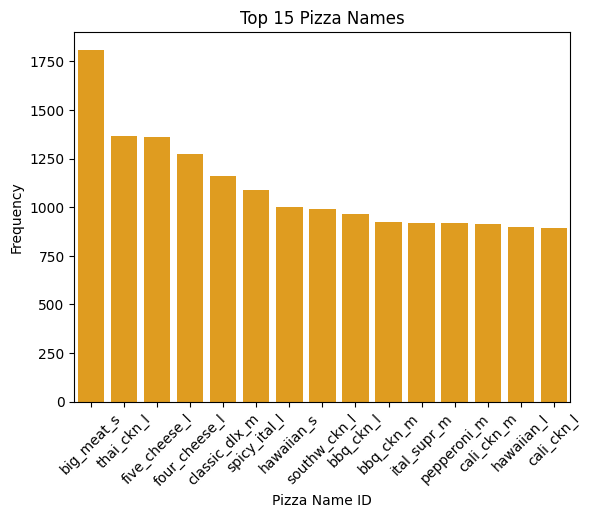

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get the top 15 models based on their frequency
top_15_models = EDA_df['pizza_name_id'].value_counts().head(15).index

# Create the countplot for the top 15 models
sns.countplot(x='pizza_name_id', data=EDA_df, color='orange', order=top_15_models)

# Set labels and title
plt.xlabel('Pizza Name ID')
plt.ylabel('Frequency')
plt.title('Top 15 Pizza Names')
plt.xticks(rotation=45)

**Let's Do the Same Thing for the pizza Name To understand the Similarity between the Pizza Name ID and the Pizza Name**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'The Classic Deluxe Pizza'),
  Text(1, 0, 'The Barbecue Chicken Pizza'),
  Text(2, 0, 'The Hawaiian Pizza'),
  Text(3, 0, 'The Pepperoni Pizza'),
  Text(4, 0, 'The Thai Chicken Pizza'),
  Text(5, 0, 'The California Chicken Pizza'),
  Text(6, 0, 'The Sicilian Pizza'),
  Text(7, 0, 'The Spicy Italian Pizza'),
  Text(8, 0, 'The Southwest Chicken Pizza'),
  Text(9, 0, 'The Four Cheese Pizza'),
  Text(10, 0, 'The Italian Supreme Pizza'),
  Text(11, 0, 'The Big Meat Pizza'),
  Text(12, 0, 'The Vegetables + Vegetables Pizza'),
  Text(13, 0, 'The Mexicana Pizza'),
  Text(14, 0, 'The Napolitana Pizza')])

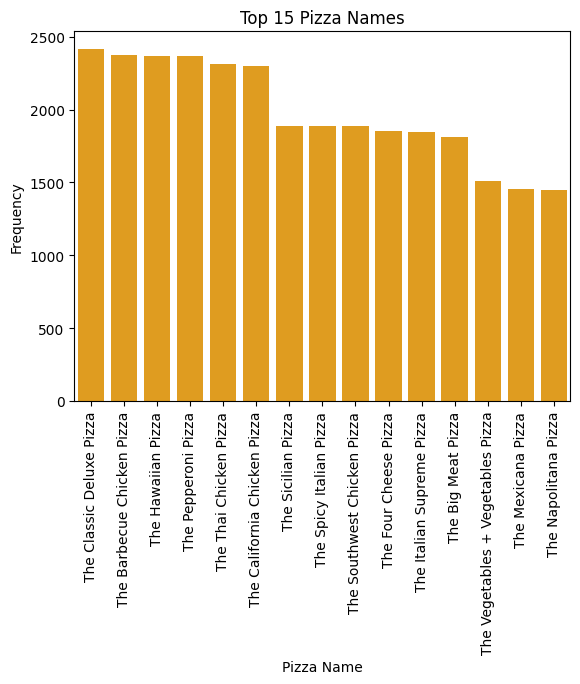

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get the top 15 models based on their frequency
top_15_models = EDA_df['pizza_name'].value_counts().head(15).index

# Create the countplot for the top 15 models
sns.countplot(x='pizza_name', data=EDA_df, color='orange', order=top_15_models)

# Set labels and title
plt.xlabel('Pizza Name')
plt.ylabel('Frequency')
plt.title('Top 15 Pizza Names')
plt.xticks(rotation=90)

**Lets Check the Similarity between the Category and the Pizza Name ID**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

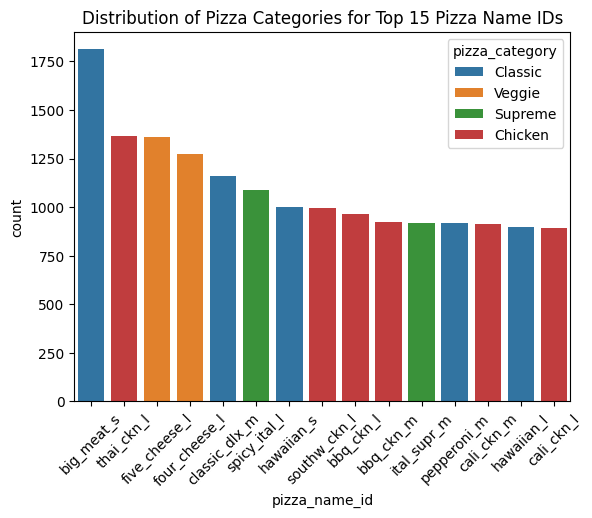

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 pizza_name_id based on their frequency
top_15_pizza_name_ids = EDA_df['pizza_name_id'].value_counts().head(15).index

# Create the countplot for the top 15 pizza_name_ids with hue as pizza_category
Final = sns.countplot(x='pizza_name_id', data=EDA_df, hue='pizza_category', order=top_15_pizza_name_ids)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Pizza Categories for Top 15 Pizza Name IDs')
# Display the plot
plt.show()


**By seeing this It was evident That the Classic and the Chicken Category is sells the Most when compare to the Other Category**

# **Analysis on the Prize with respect to other pizza charateristics**

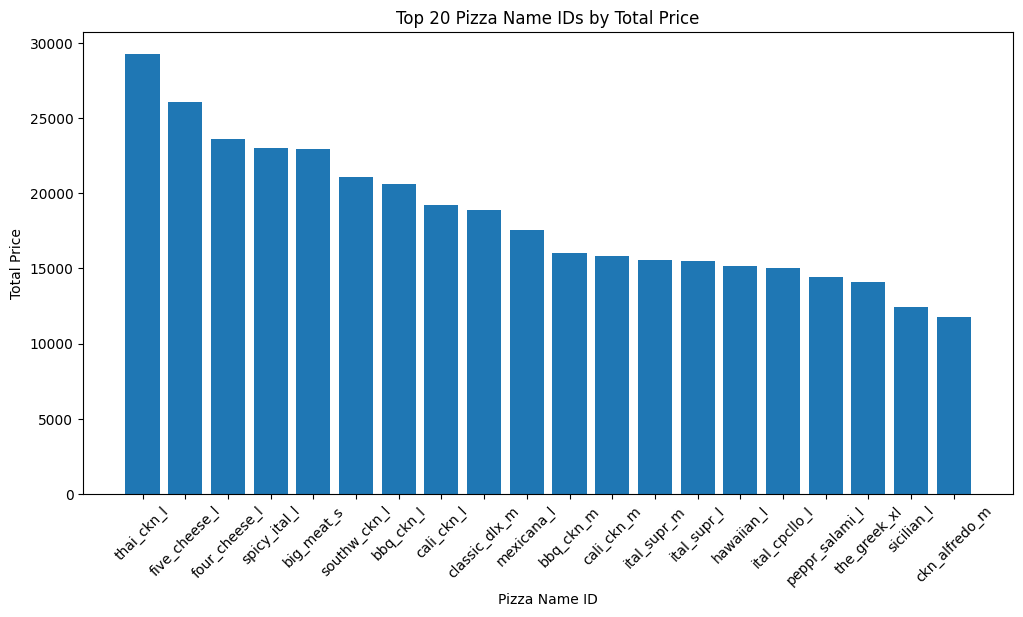

In [18]:

import matplotlib.pyplot as plt
# Group by pizza_name_id and calculate the total price for each pizza
pizza_name_id_total_price = EDA_df.groupby('pizza_name_id')['total_price'].sum()

# Sort the pizza_name_id by total price in descending order
top_20_pizza_name_ids = pizza_name_id_total_price.sort_values(ascending=False).head(20)

# Create a bar plot for the top 20 pizza_name_ids
plt.figure(figsize=(12, 6))
plt.bar(top_20_pizza_name_ids.index, top_20_pizza_name_ids.values)
plt.xlabel('Pizza Name ID')
plt.ylabel('Total Price')
plt.title('Top 20 Pizza Name IDs by Total Price')
plt.xticks(rotation=45)
plt.show()


**Let's Do the Same for pizza_category as well**

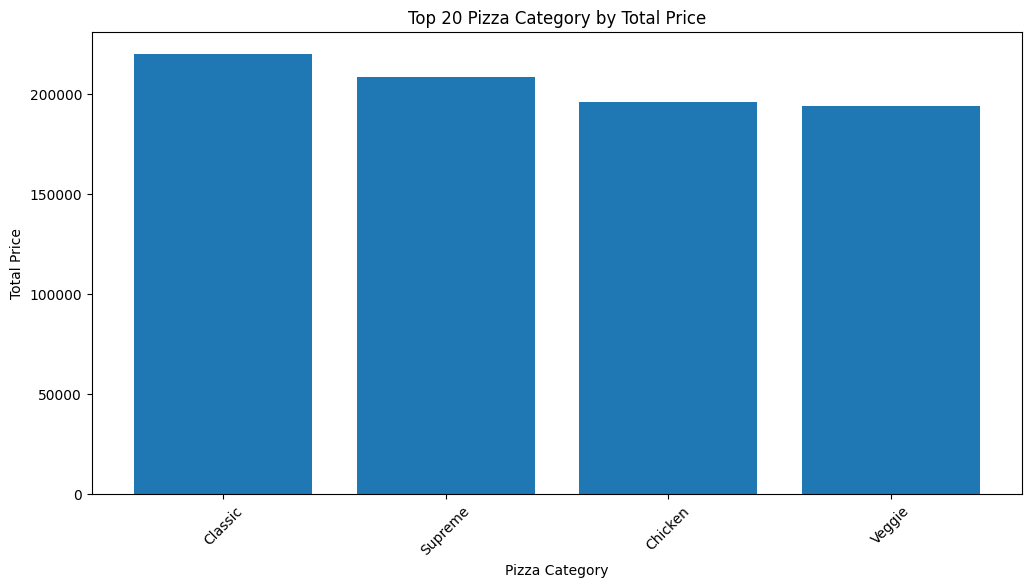

In [19]:

import matplotlib.pyplot as plt
# Group by pizza_name_id and calculate the total price for each pizza
pizza_name_id_total_price = EDA_df.groupby('pizza_category')['total_price'].sum()

# Sort the pizza_name_id by total price in descending order
top_20_pizza_name_ids = pizza_name_id_total_price.sort_values(ascending=False).head(20)

# Create a bar plot for the top 20 pizza_name_ids
plt.figure(figsize=(12, 6))
plt.bar(top_20_pizza_name_ids.index, top_20_pizza_name_ids.values)
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.title('Top 20 Pizza Category by Total Price')
plt.xticks(rotation=45)
plt.show()


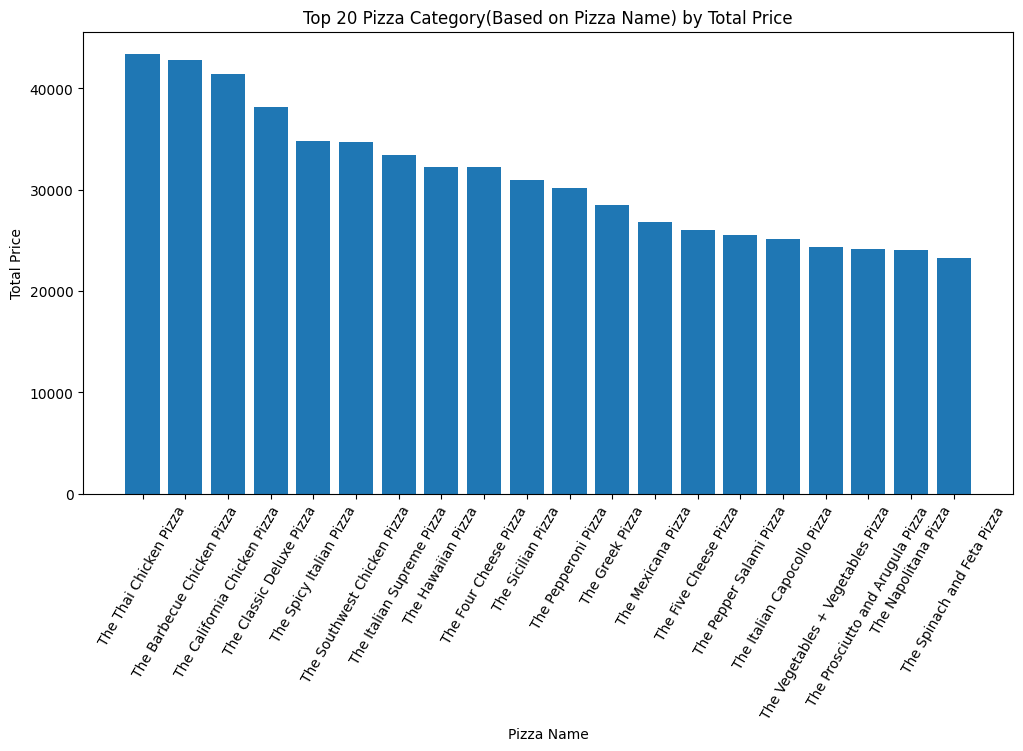

In [20]:

import matplotlib.pyplot as plt
# Group by pizza_name_id and calculate the total price for each pizza
pizza_name_id_total_price = EDA_df.groupby('pizza_name')['total_price'].sum()

# Sort the pizza_name_id by total price in descending order
top_20_pizza_name_ids = pizza_name_id_total_price.sort_values(ascending=False).head(20)

# Create a bar plot for the top 20 pizza_name_ids
plt.figure(figsize=(12, 6))
plt.bar(top_20_pizza_name_ids.index, top_20_pizza_name_ids.values)
plt.xlabel('Pizza Name')
plt.ylabel('Total Price')
plt.title('Top 20 Pizza Category(Based on Pizza Name) by Total Price')
plt.xticks(rotation=60)
plt.show()


**So By End Of all this exploration I get to Know that The Tai and Classic type and the Barbecue kind of categorya and pizza are performing Better**

**Seasonality Check With Respect to the Quantity**

In [21]:


import matplotlib.pyplot as plt
# Group by pizza_name_id and order_date_week, then calculate the total quantity for each group
weekly_pizza_quantity = EDA_df.groupby(['pizza_name_id', 'order_date_week'])['quantity'].sum().reset_index()

# Pivot the table to have weeks as columns and pizza_name_id as rows
pizza_quantity_trend = weekly_pizza_quantity.pivot(index='pizza_name_id', columns='order_date_week', values='quantity')

# Fill NaN values with 0 (if any)
pizza_quantity_trend = pizza_quantity_trend.fillna(0)

# Display the trend of quantity over weeks for each pizza_name_id
print(pizza_quantity_trend)


order_date_week    1     2     3     4     5     6     7     8     9     10  \
pizza_name_id                                                                 
bbq_ckn_l        12.0  25.0  24.0  15.0  28.0  17.0  33.0  16.0  19.0  21.0   
bbq_ckn_m        13.0  22.0  19.0  18.0  18.0  15.0  19.0  17.0  17.0  17.0   
bbq_ckn_s         2.0  14.0   9.0  12.0   4.0  13.0  13.0  10.0   6.0  14.0   
big_meat_s       20.0  35.0  27.0  38.0  35.0  36.0  32.0  35.0  41.0  43.0   
brie_carre_s      4.0   7.0   4.0  11.0   8.0  12.0   8.0   9.0   6.0  11.0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
the_greek_xl      6.0  14.0  11.0  10.0  11.0  16.0  13.0   8.0  14.0   8.0   
the_greek_xxl     0.0   0.0   0.0   0.0   2.0   0.0   1.0   1.0   1.0   0.0   
veggie_veg_l      5.0   9.0   9.0   6.0  13.0   7.0   8.0   9.0  13.0  14.0   
veggie_veg_m      3.0  14.0  19.0  17.0  10.0  12.0  11.0  11.0  17.0  10.0   
veggie_veg_s      7.0  12.0   5.0  13.0   9.0   7.0 

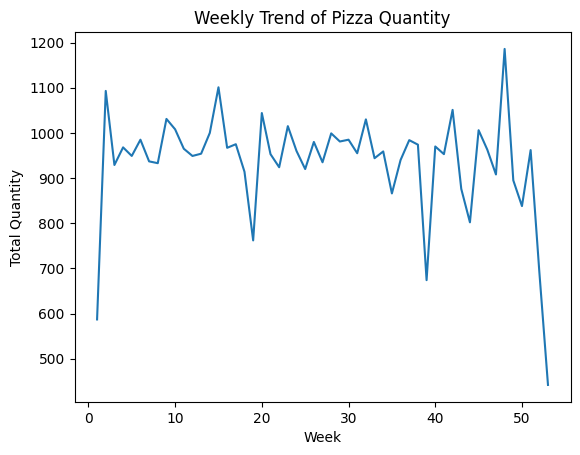

In [22]:
#ploting the overall trend by summing the quantity across all pizza_name_ids for each week
weekly_total_quantity = pizza_quantity_trend.sum(axis=0)
plt.plot(weekly_total_quantity.index, weekly_total_quantity.values)
plt.xlabel('Week')
plt.ylabel('Total Quantity')
plt.title('Weekly Trend of Pizza Quantity')
plt.show()

order_date_date  2015-01-01  2015-01-02  2015-01-03  2015-01-04  2015-01-05  \
pizza_name_id                                                                 
bbq_ckn_l               6.0         4.0         2.0         0.0         2.0   
bbq_ckn_m               4.0         7.0         0.0         2.0         2.0   
bbq_ckn_s               1.0         1.0         0.0         0.0         2.0   
big_meat_s              5.0         9.0         3.0         3.0         1.0   
brie_carre_s            0.0         3.0         1.0         0.0         1.0   
...                     ...         ...         ...         ...         ...   
the_greek_xl            1.0         2.0         1.0         2.0         1.0   
the_greek_xxl           0.0         0.0         0.0         0.0         0.0   
veggie_veg_l            1.0         1.0         3.0         0.0         2.0   
veggie_veg_m            0.0         0.0         1.0         2.0         2.0   
veggie_veg_s            2.0         0.0         2.0 

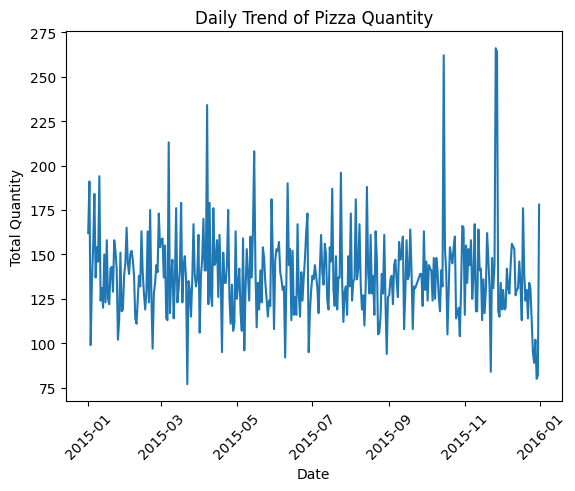

In [23]:

import matplotlib.pyplot as plt
# Group by pizza_name_id and order_date, then calculate the total quantity for each group
daily_pizza_quantity = EDA_df.groupby(['pizza_name_id', 'order_date_date'])['quantity'].sum().reset_index()

# Pivot the table to have dates as columns and pizza_name_id as rows
pizza_quantity_trend_daily = daily_pizza_quantity.pivot(index='pizza_name_id', columns='order_date_date', values='quantity')

# Fill NaN values with 0 (if any)
pizza_quantity_trend_daily = pizza_quantity_trend_daily.fillna(0)

# Display the trend of quantity over days for each pizza_name_id
print(pizza_quantity_trend_daily)

# Plotting the overall trend by summing the quantity across all pizza_name_ids for each day
daily_total_quantity = pizza_quantity_trend_daily.sum(axis=0)
plt.plot(daily_total_quantity.index, daily_total_quantity.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Daily Trend of Pizza Quantity')
plt.xticks(rotation=45)
plt.show()


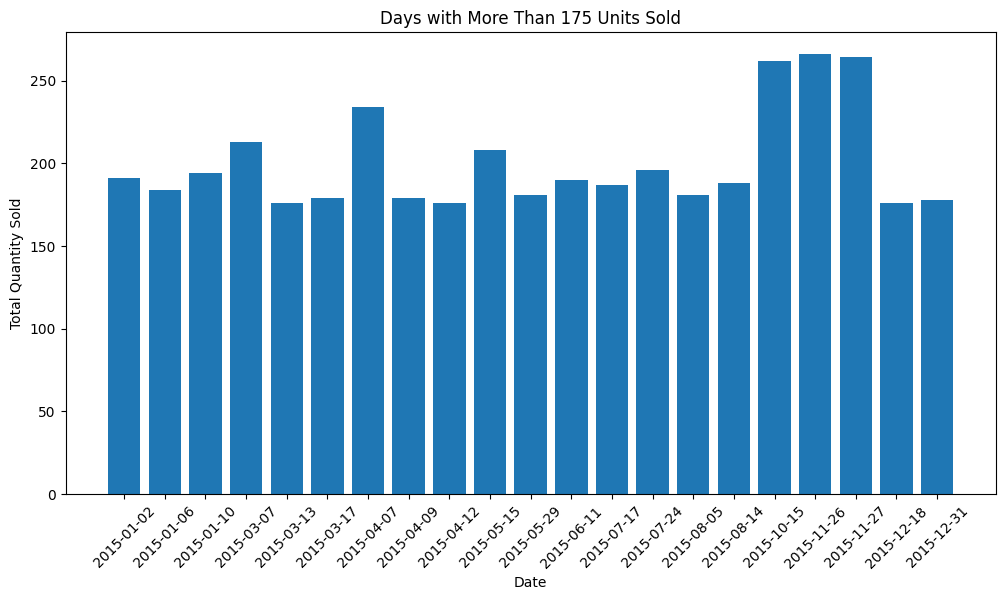

In [31]:
import matplotlib.pyplot as plt

# Group by order_date and calculate the total quantity sold
daily_sales = EDA_df.groupby('order_date')['quantity'].sum()

# Filter the days with more than 175 units sold
high_sales_days = daily_sales[daily_sales > 175]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(high_sales_days.index.strftime('%Y-%m-%d'), high_sales_days.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.title('Days with More Than 175 Units Sold')
plt.xticks(rotation=45)
plt.show()


order_date_month   1    2    3    4    5    6    7    8    9    10   11   12
pizza_name_id                                                               
bbq_ckn_l         101   85   90   98   86   75   70   74   82   67   88   76
bbq_ckn_m          86   69   77   96   80   76   84   83   73   74   98   60
bbq_ckn_s          39   43   46   29   37   41   58   34   36   39   47   35
big_meat_s        147  144  185  152  169  148  196  167  151  153  163  139
brie_carre_s       34   34   40   46   41   39   45   38   41   38   50   44
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
the_greek_xl       51   48   45   44   42   50   50   43   40   50   48   41
the_greek_xxl       2    3    3    2    3    2    1    1    3    3    3    2
veggie_veg_l       38   39   45   33   28   34   37   27   33   40   34   39
veggie_veg_m       62   48   57   60   44   51   59   51   36   48   62   57
veggie_veg_s       46   36   43   42   34   40   40   34   29   44   38   38

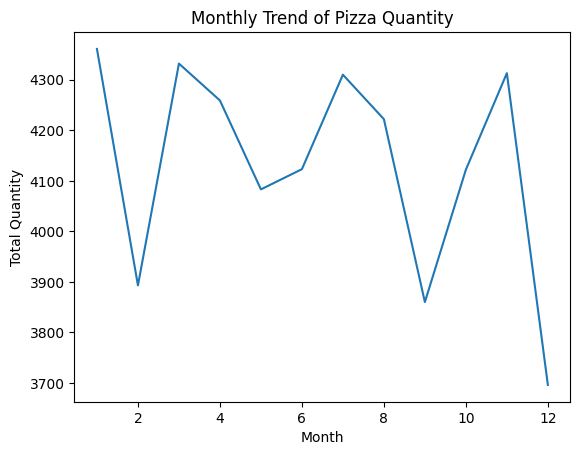

In [24]:
import matplotlib.pyplot as plt
# Group by pizza_name_id and order_date_month, then calculate the total quantity for each group
monthly_pizza_quantity = EDA_df.groupby(['pizza_name_id', 'order_date_month'])['quantity'].sum().reset_index()

# Pivot the table to have months as columns and pizza_name_id as rows
pizza_quantity_trend_monthly = monthly_pizza_quantity.pivot(index='pizza_name_id', columns='order_date_month', values='quantity')

# Fill NaN values with 0 (if any)
pizza_quantity_trend_monthly = pizza_quantity_trend_monthly.fillna(0)

# Display the trend of quantity over months for each pizza_name_id
print(pizza_quantity_trend_monthly)

# Plotting the overall trend by summing the quantity across all pizza_name_ids for each month
monthly_total_quantity = pizza_quantity_trend_monthly.sum(axis=0)
plt.plot(monthly_total_quantity.index, monthly_total_quantity.values)
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Trend of Pizza Quantity')
plt.show()


**By seeing this I can able to see there is a No Seasonality(increasing Trend) in this Data So While training the Model We need to take Care of this as well and Lets Do the Hypothesis Testing to Confirm that There is No Seasonality**

In [25]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Function to check seasonality for all pizza_name_id entries
def check_seasonality_all(df):
    unique_pizza_ids = df['pizza_name_id'].unique()  # Get unique pizza IDs

    for pizza_id in unique_pizza_ids:
        # Filter data for the specific pizza name
        pizza_data = df[df['pizza_name_id'] == pizza_id].set_index('order_date_week')['quantity']

        # Check if the time series is constant
        if len(pizza_data.unique()) > 1:
            # Perform Augmented Dickey-Fuller test
            result = adfuller(pizza_data)
            p_value = result[1]

            if p_value < 0.05:
                print(f"The time series for pizza ID {pizza_id} is stationary (not seasonal).")
            else:
                print(f"The time series for pizza ID {pizza_id} is non-stationary (may be seasonal).")
        else:
            print(f"The time series for pizza ID {pizza_id} is constant - ADF test not applicable.")

check_seasonality_all(EDA_df)

The time series for pizza ID hawaiian_m is stationary (not seasonal).
The time series for pizza ID classic_dlx_m is stationary (not seasonal).
The time series for pizza ID five_cheese_l is stationary (not seasonal).
The time series for pizza ID ital_supr_l is stationary (not seasonal).
The time series for pizza ID mexicana_m is stationary (not seasonal).
The time series for pizza ID thai_ckn_l is stationary (not seasonal).
The time series for pizza ID ital_supr_m is stationary (not seasonal).
The time series for pizza ID prsc_argla_l is stationary (not seasonal).
The time series for pizza ID bbq_ckn_s is stationary (not seasonal).
The time series for pizza ID the_greek_s is stationary (not seasonal).
The time series for pizza ID spinach_supr_s is stationary (not seasonal).
The time series for pizza ID classic_dlx_s is stationary (not seasonal).
The time series for pizza ID green_garden_s is stationary (not seasonal).
The time series for pizza ID ital_cpcllo_l is stationary (not seasona

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


The time series for pizza ID prsc_argla_s is stationary (not seasonal).
The time series for pizza ID sicilian_m is stationary (not seasonal).
The time series for pizza ID veggie_veg_l is stationary (not seasonal).
The time series for pizza ID ckn_alfredo_s is constant - ADF test not applicable.
The time series for pizza ID pepperoni_s is stationary (not seasonal).
The time series for pizza ID green_garden_l is stationary (not seasonal).
The time series for pizza ID green_garden_m is stationary (not seasonal).
The time series for pizza ID pep_msh_pep_l is stationary (not seasonal).
The time series for pizza ID hawaiian_s is stationary (not seasonal).
The time series for pizza ID peppr_salami_m is stationary (not seasonal).
The time series for pizza ID ckn_alfredo_m is stationary (not seasonal).
The time series for pizza ID peppr_salami_l is stationary (not seasonal).
The time series for pizza ID spin_pesto_s is stationary (not seasonal).
The time series for pizza ID thai_ckn_m is statio

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


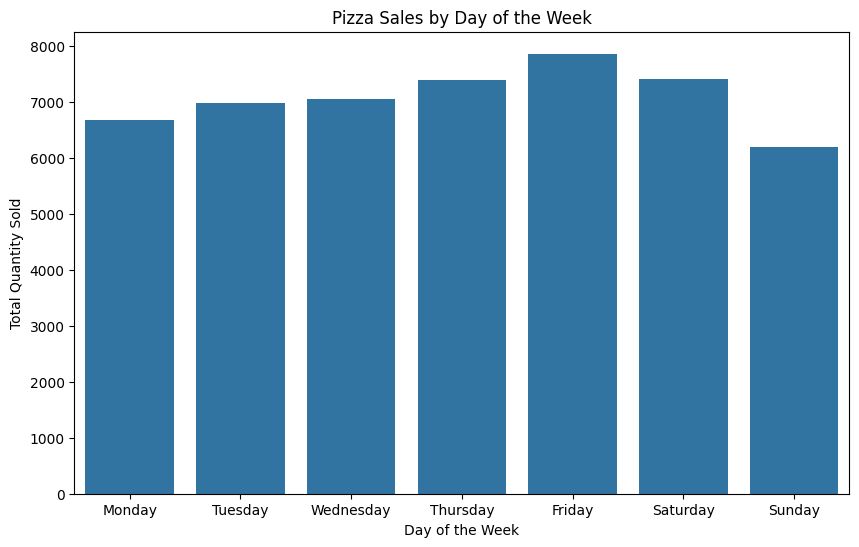

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

# Extract the day of the week from the order_date
EDA_df['order_day'] = EDA_df['order_date'].dt.day_name()

# Group by day of the week and calculate the total quantity sold
daily_quantity = EDA_df.groupby('order_day')['quantity'].sum()

# Order the days of the week for the plot
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_quantity = daily_quantity.loc[ordered_days]

# Create a bar plot to visualize sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_quantity.index, y=daily_quantity.values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.title('Pizza Sales by Day of the Week')
plt.show()


**There is no Effect on the Holiday the quantity sold remains almodt the same in all day.**



> ***Conclusion: By End of the EDA I have got an insight about best performing Category and Pizza_name in the Dominos Pizza Data and also Find out whether the data is stationary or not in addition to that I have found the is Divided by Zero error I have encoundered. All this need to be Taken care While performing the Model Traing and thr Forecastion.***

